In [42]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 




In [43]:
%matplotlib inline
plt.style.use('bmh')


In [44]:
carspd = pd.read_csv('carsoutlier.csv')


In [45]:
carspd1 = pd.read_csv('cars.csv')

In [46]:
carspd.head()

,make,model,year,milage,fuel,horsepower,transmission,price
0,MINI,Mini,2018,34503,Petrol,189,Manual,17799
1,Mercedes-Benz,GLC-Class,2018,11294,Petrol,362,Automatic,40500
2,Land Rover,ROVER,2020,17800,Diesel,178,Automatic,51495
3,AUDI,RS3,2016,32400,Petrol,362,SemiAutomatic,35990
4,BMW,3,2013,52894,Petrol,414,SemiAutomatic,29990


Here we can see that our features all have equal values. Our data is clean and uniform, ready to train

In [47]:
carspd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6423 entries, 0 to 6422
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          6423 non-null   object
 1   model         6423 non-null   object
 2   year          6423 non-null   int64 
 3   milage        6423 non-null   int64 
 4   fuel          6423 non-null   object
 5   horsepower    6423 non-null   int64 
 6   transmission  6423 non-null   object
 7   price         6423 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 401.6+ KB


As shown below, we can see that the prices of the cars in our dataset are skewed to the left. We have some outliers the lie above the price of around 120,000. We will get rid of these to get a normal distribution of the independant variable

count    6423.000000
mean      165.709482
std        96.829112
min        10.000000
25%       103.000000
50%       134.000000
75%       189.000000
max       762.000000
Name: horsepower, dtype: float64


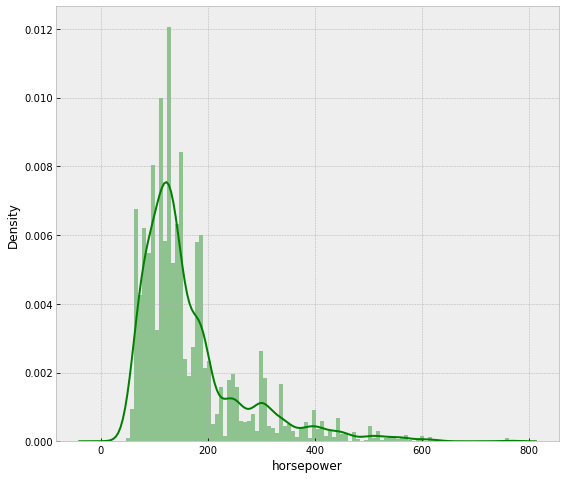

In [48]:
print(carspd['horsepower'].describe())
plt.figure(figsize=(9,8))
sns.distplot(carspd['horsepower'], color='g', bins=100, hist_kws={'alpha':0.4});

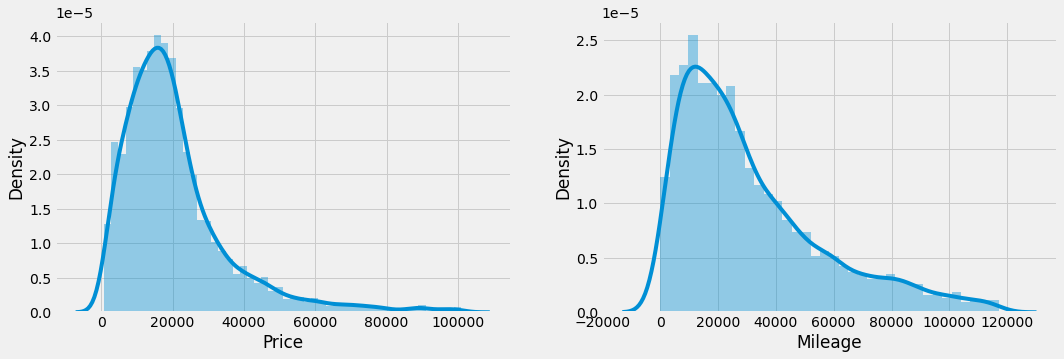

In [97]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.xlabel('Price')
sns.distplot(carspd[['price']])
plt.subplot(1,2,2)
plt.xlabel('Mileage')
sns.distplot(carspd[['milage']])
plt.show()

In [106]:
outliers = pd.read_csv('cars11.csv')

KeyError: "None of [Index(['milage'], dtype='object')] are in the [columns]"

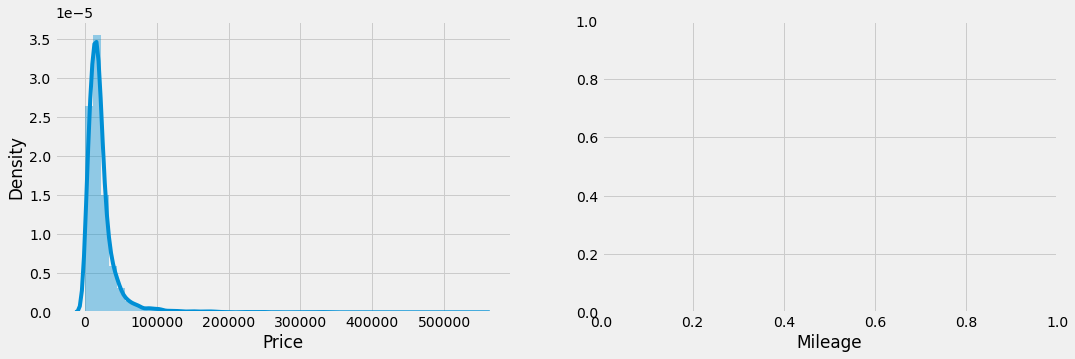

In [116]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.xlabel('Price')
sns.distplot(outliers[['price']])
plt.subplot(1,2,2)
plt.xlabel('Mileage')
sns.distplot(outliers[['milage']])
plt.show()

In [103]:
print("Highest allowed",outliers[['price']].mean() + 3*carspd1[['price']].std())
print("Highest allowed",outliers[['milage']].mean() + 3*carspd1[['milage']].std())

Highest allowed price    68950.042215
dtype: float64
Highest allowed milage    108013.96943
dtype: float64


In [52]:
#carspd = pd.read_csv('carsoutlier.csv')

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

carspd[['make', 'model', 'transmission', 'fuel']] = carspd[['make', 'model', 'transmission', 'fuel']].apply(le.fit_transform)

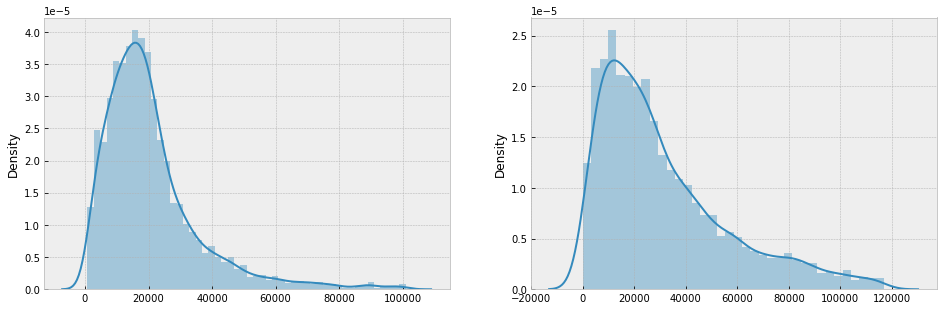

In [54]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(carspd[['price']])
plt.subplot(1,2,2)
sns.distplot(carspd[['milage']])
plt.show()

In [55]:
list(set(carspd.dtypes.tolist()))


[dtype('int64')]

In [111]:
carspd_num = carspd[['make', 'model', 'transmission', 'fuel']].select_dtypes(include=['int64'])
carspd_num.head()

,make,model,transmission,fuel
0,92,347,2,3
1,98,241,0,3
2,82,403,0,0
3,42,405,3,3
4,49,30,3,3


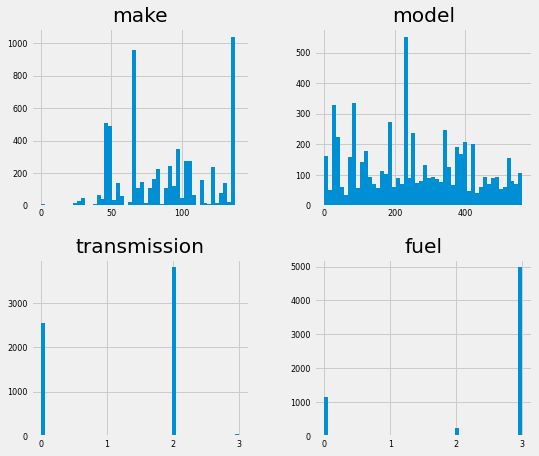

In [115]:
carspd_num.hist(figsize=(8, 7), bins=50, xlabelsize=8, ylabelsize=8);

In [58]:
carspd_num_corr = carspd_num.corr()['price'][:-1] # -1 because the latest row is SalePrice
golden_features_list = carspd_num_corr[abs(carspd_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Price:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Price:
horsepower    0.766223
Name: price, dtype: float64


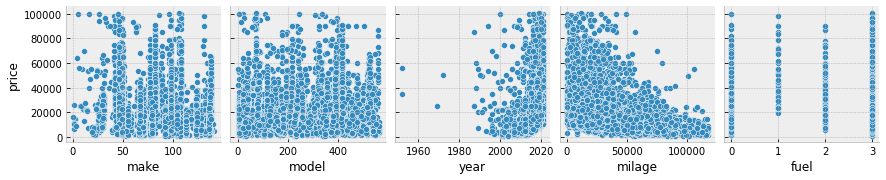

In [59]:
for i in range(0, len(carspd_num.columns), 10):
    sns.pairplot(data=carspd_num,
                x_vars=carspd_num.columns[i:i+5],
                y_vars=['price'])

In [60]:
#x = carspd[['year','milage','horsepower']]
x = carspd[['make','model','year','milage','fuel','horsepower', 'transmission']]
y = carspd['price']

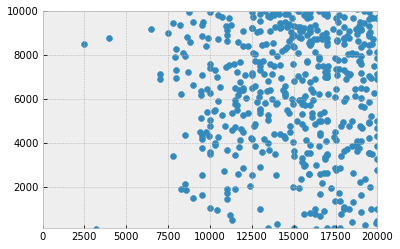

In [61]:

plt.scatter(carspd['price'], carspd['milage'])
plt.ylim([100, 10000])
plt.xlim([0,20000])
plt.show()


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)


In [63]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

xtrain = sc.fit_transform(x_train)
xtest = sc.fit_transform(x_test)

In [64]:
from sklearn.ensemble import RandomForestRegressor


In [65]:
clf = RandomForestRegressor(n_estimators=100)

clf.fit(xtrain,y_train)

RandomForestRegressor()

In [66]:
pred = clf.predict(xtest)

In [122]:
score=r2_score(y_test,pred)
score

0.5459864403449719

In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [68]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))

Mean Absolute Error: 8247.15
Mean Squared Error: 112074362.33
Root Mean Squared Error: 10586.52


In [69]:
regr = linear_model.LinearRegression()
regr.fit(xtrain,y_train)
predR = regr.predict(xtest)
score=r2_score(y_test,predR)

In [70]:
score

0.6344297596958977

In [71]:
carspd.make.unique()

array([ 92,  98,  82,  42,  49,  75, 119, 108,  32, 135,  52,  39,  96,
       104,  81,  46, 106, 137, 100, 136,  66, 132,  70, 124,  67, 123,
        79, 107,  55,  71, 113,  45,  95, 128,  77,  90,  78,  58,  84,
        57,  43, 138,  27,  44, 125, 116,  50,  16, 131, 118, 127,  54,
        65, 126,  97,   2,  15,  36,  17,  38,  22,  21,  31,  25,  28,
        29,  26, 103,  30,  41,  89, 134,  64, 120,  80, 105,  68, 111,
        48,  87, 122,  69, 121, 133,  86,  94,  51,  83,  11,  99,  19,
         7,  10,  13,  14,  74,  73,  53, 129,  85,  24,   5, 117, 114,
       102,  91,  63, 110,   1, 141, 130,  23,  76,   9,   0,  47,  93,
        56, 139,  40,   4, 101,  62,  35,  59,   6, 112,  72, 109,  20,
        37,  33,   8,  88,  12, 115,   3,  18, 140,  34,  61,  60])

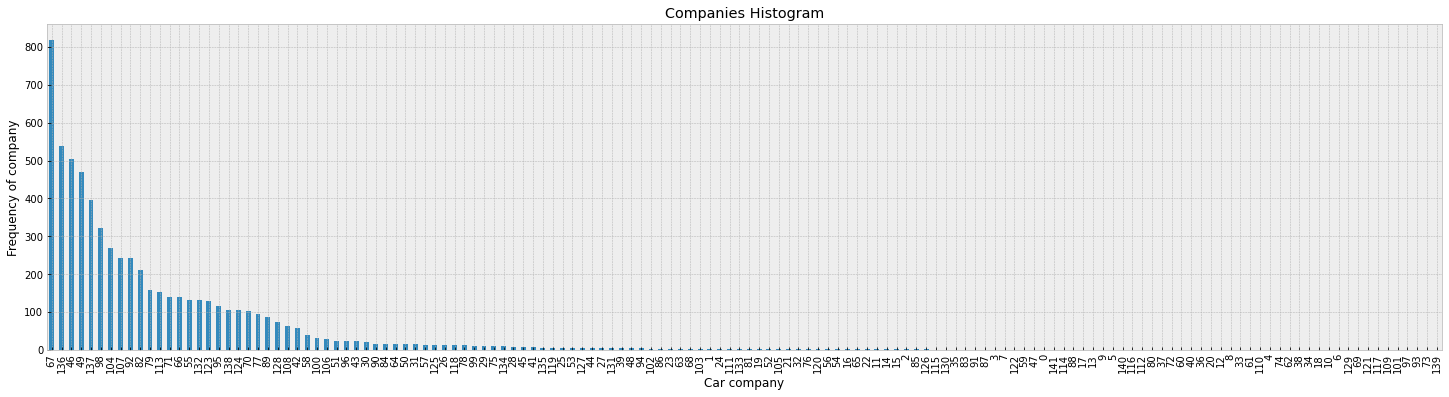

In [72]:
plt.figure(figsize=(25, 6))


plt1 = carspd.make.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')




plt.show()

[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Frequency of fuel type')]

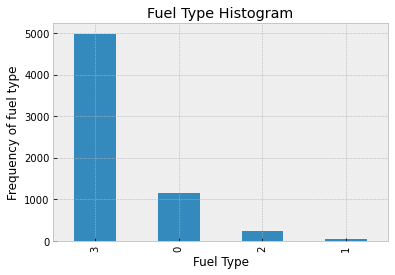

In [73]:
plt1 = carspd.fuel.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Frequency of fuel type')]

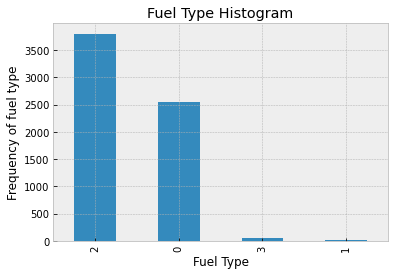

In [74]:
plt1 = carspd.transmission.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

In [75]:
carspd.transmission


0       2
1       0
2       0
3       3
4       3
       ..
6418    2
6419    2
6420    2
6421    0
6422    2
Name: transmission, Length: 6423, dtype: int64

In [76]:
trans = carspd.transmission

In [77]:
count = carspd['make'].value_counts()

count

67     819
136    539
46     505
49     469
137    395
      ... 
101      1
97       1
93       1
73       1
139      1
Name: make, Length: 142, dtype: int64

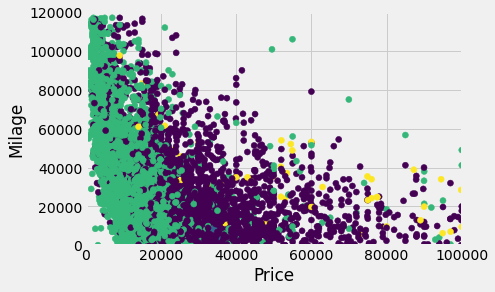

In [126]:
plt.scatter(carspd['price'], carspd['milage'], label=trans, c=trans)
plt.ylim([0, 120000])
plt.ylabel('Milage')
plt.xlabel('Price')

plt.xlim([0,100000])
plt.show()

In [79]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= clf
features= carspd.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [80]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(xtrain, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

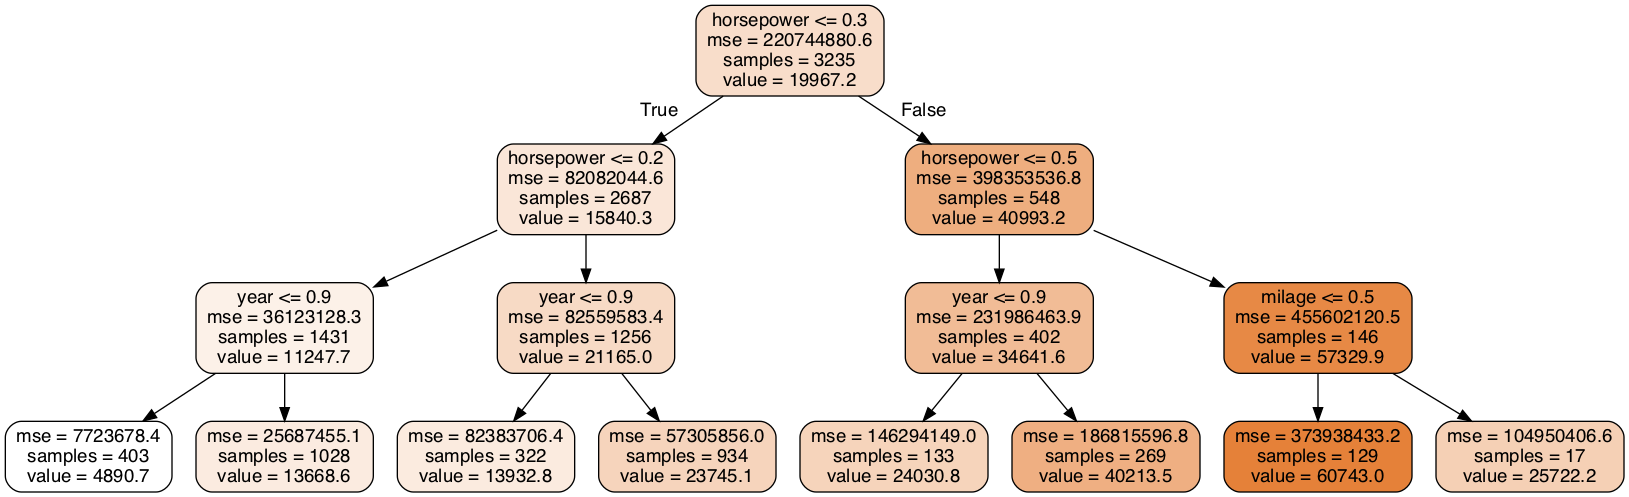

In [94]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'small_tree.png')

In [81]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: horsepower           Importance: 0.63
Variable: year                 Importance: 0.16
Variable: milage               Importance: 0.08
Variable: make                 Importance: 0.04
Variable: model                Importance: 0.04
Variable: fuel                 Importance: 0.03
Variable: transmission         Importance: 0.02


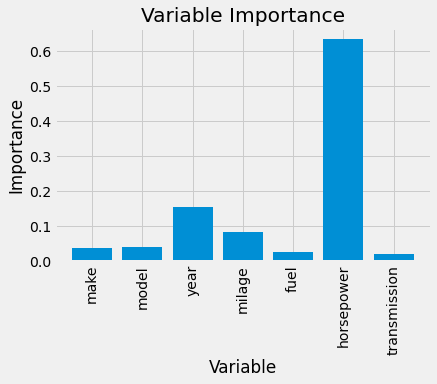

In [82]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importance');

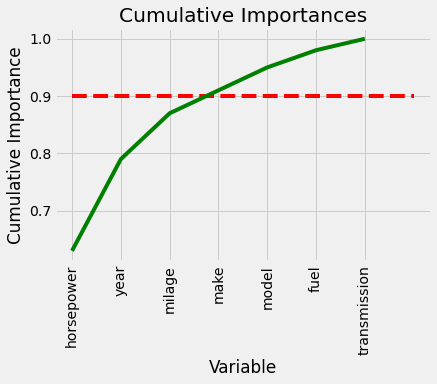

In [83]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

New Random Tree Classifier with only most important variables

In [84]:
rf_most_important = RandomForestRegressor(n_estimators=100)

features = carspd.drop('price', axis=1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('milage'),
                     feature_list.index('make'), feature_list.index('model'), feature_list.index('horsepower')]
train_important = x_train.iloc[:, important_indices]
test_important = x_test.iloc[:, important_indices]

In [85]:
rf_most_important.fit(train_important, y_train)

RandomForestRegressor()

In [86]:
predictions = rf_most_important.predict(test_important)


In [123]:
score=r2_score(y_test,predictions)
score

0.8821916667402087

In [87]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 3115.02
Mean Squared Error: 29081276.42
Root Mean Squared Error: 5392.71


In [88]:
regr1 = linear_model.LinearRegression()
regr1.fit(train_important,y_train)
predR = regr1.predict(test_important)
score=r2_score(y_test,predR)

In [89]:
score

0.7060862051716643

In [90]:
carspd1 = pd.read_csv('carsoutlier.csv')


In [91]:
testing = carspd1[('Golf') == carspd1['model']]

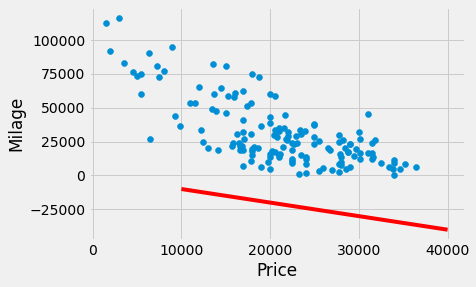

In [92]:
plt.scatter(testing['price'], testing['milage'])
x = np.linspace(40000,10000)
y = -x
plt.plot(x, y, '-r')
plt.xlabel('Price')
plt.ylabel('Milage')
#plt.ylim([100, 50000])
#plt.xlim([0,50000])
plt.show()


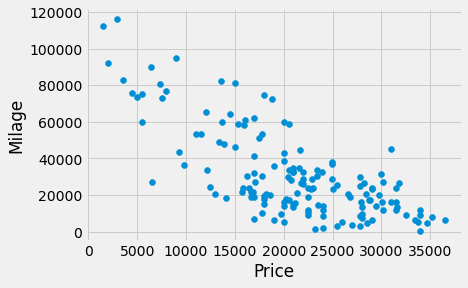

In [118]:
plt.scatter(testing['price'], testing['milage'])
#plt.ylim([100, 30000])
#plt.xlim([0,50000])
plt.xlabel('Price')
plt.ylabel('Milage')
plt.show()

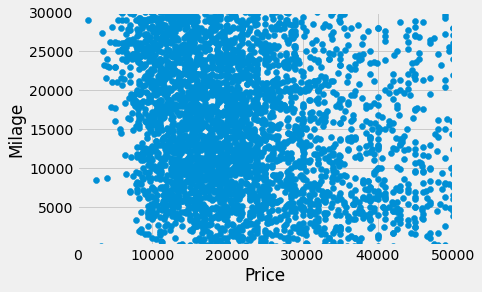

In [93]:
plt.scatter(carspd1['price'], carspd1['milage'])
plt.ylim([100, 30000])
plt.xlim([0,50000])
plt.xlabel('Price')
plt.ylabel('Milage')
plt.show()
